In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2



In [2]:
data_dir = "../cropped"

In [3]:

def create_dataframe(dir):
    image_paths = []
    card_type = []

    for cardtype in os.listdir(dir):
        cardtype_path = os.path.join(dir, cardtype)

        if os.path.isdir(cardtype_path):
            for filename in os.listdir(cardtype_path):
                if filename.endswith('jpg'):
                    image_paths.append(os.path.join(dir, cardtype, filename))
                    # splitting by shading
                    card_type.append(cardtype[2:3])
    return image_paths, card_type

In [4]:
data = pd.DataFrame()
data['images'], data['card type'] = create_dataframe(data_dir)

In [ ]:
print(data['images'][0], data['card type'][0])

In [5]:
def reshape_images(images):
    reshaped = []
    for image in tqdm(images):
        img = load_img(image)
        img = np.array(img)
        reshaped.append(img)
    reshaped = np.array(reshaped)
    reshaped = reshaped.reshape(len(reshaped), 200, 150, 3)

    return reshaped

In [6]:
data_reshaped = reshape_images(data['images'])

x = data_reshaped / 255.0

  0%|          | 0/2307 [00:00<?, ?it/s]

In [7]:
le = LabelEncoder()

le.fit(data['card type'])


y = le.transform(data['card type'])
y = to_categorical(y, num_classes=3)

In [8]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2307, 200, 150, 3)
Shape of y: (2307, 3)


In [9]:
model = Sequential()

model.add(Input(shape=(200, 150, 3)))
model.add(Conv2D(32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))

In [10]:
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))

model.add(Dense(3, activation= "softmax"))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
checkpoint = ModelCheckpoint("../models/symbol", monitor = "val_accuracy", verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = "val_loss", min_delta = 0.001, patience = 5, verbose = 1, restore_best_weights = True)

reduced_learning_rate = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 3, verbose = 1, min_delta = 0.0001)


callbacks_list = [checkpoint, early_stopping, reduced_learning_rate]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [14]:
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = 50, validation_data = (x_test, y_test), callbacks = callbacks_list)

Epoch 1/50
58/58 [==============================] - ETA: 0s - loss: 1.0981 - accuracy: 0.3507
Epoch 1: val_accuracy did not improve from 0.33983
58/58 [==============================] - 28s 484ms/step - loss: 1.0981 - accuracy: 0.3507 - val_loss: 1.0985 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 2/50
58/58 [==============================] - ETA: 0s - loss: 1.0974 - accuracy: 0.3507
Epoch 2: val_accuracy did not improve from 0.33983
58/58 [==============================] - 27s 466ms/step - loss: 1.0974 - accuracy: 0.3507 - val_loss: 1.0984 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 3/50
58/58 [==============================] - ETA: 0s - loss: 1.0977 - accuracy: 0.3507
Epoch 3: val_accuracy did not improve from 0.33983
58/58 [==============================] - 26s 457ms/step - loss: 1.0977 - accuracy: 0.3507 - val_loss: 1.0983 - val_accuracy: 0.3398 - lr: 1.0000e-04
Epoch 4/50
58/58 [==============================] - ETA: 0s - loss: 1.0972 - accuracy: 0.3507
Epoch 4: val_accuracy di

INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 28s 486ms/step - loss: 1.0881 - accuracy: 0.3837 - val_loss: 1.0857 - val_accuracy: 0.4892 - lr: 1.0000e-04
Epoch 9/50
58/58 [==============================] - ETA: 0s - loss: 1.0473 - accuracy: 0.4466
Epoch 9: val_accuracy improved from 0.48918 to 0.61039, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 469ms/step - loss: 1.0473 - accuracy: 0.4466 - val_loss: 0.9515 - val_accuracy: 0.6104 - lr: 1.0000e-04
Epoch 10/50
58/58 [==============================] - ETA: 0s - loss: 0.7988 - accuracy: 0.6596
Epoch 10: val_accuracy improved from 0.61039 to 0.79870, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 470ms/step - loss: 0.7988 - accuracy: 0.6596 - val_loss: 0.6025 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 11/50
58/58 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.8314
Epoch 11: val_accuracy improved from 0.79870 to 0.93074, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 472ms/step - loss: 0.4672 - accuracy: 0.8314 - val_loss: 0.2959 - val_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 12/50
58/58 [==============================] - ETA: 0s - loss: 0.2963 - accuracy: 0.9014
Epoch 12: val_accuracy improved from 0.93074 to 0.95022, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 28s 477ms/step - loss: 0.2963 - accuracy: 0.9014 - val_loss: 0.2095 - val_accuracy: 0.9502 - lr: 1.0000e-04
Epoch 13/50
58/58 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9339
Epoch 13: val_accuracy did not improve from 0.95022
58/58 [==============================] - 27s 460ms/step - loss: 0.1940 - accuracy: 0.9339 - val_loss: 0.2113 - val_accuracy: 0.9113 - lr: 1.0000e-04
Epoch 14/50
58/58 [==============================] - ETA: 0s - loss: 0.1608 - accuracy: 0.9469
Epoch 14: val_accuracy improved from 0.95022 to 0.97186, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 472ms/step - loss: 0.1608 - accuracy: 0.9469 - val_loss: 0.1119 - val_accuracy: 0.9719 - lr: 1.0000e-04
Epoch 15/50
58/58 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9561
Epoch 15: val_accuracy improved from 0.97186 to 0.98268, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 28s 476ms/step - loss: 0.1326 - accuracy: 0.9561 - val_loss: 0.0926 - val_accuracy: 0.9827 - lr: 1.0000e-04
Epoch 16/50
58/58 [==============================] - ETA: 0s - loss: 0.0900 - accuracy: 0.9702
Epoch 16: val_accuracy improved from 0.98268 to 0.98485, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 464ms/step - loss: 0.0900 - accuracy: 0.9702 - val_loss: 0.0701 - val_accuracy: 0.9848 - lr: 1.0000e-04
Epoch 17/50
58/58 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9762
Epoch 17: val_accuracy improved from 0.98485 to 0.98701, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 26s 456ms/step - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.0654 - val_accuracy: 0.9870 - lr: 1.0000e-04
Epoch 18/50
58/58 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9783
Epoch 18: val_accuracy did not improve from 0.98701
58/58 [==============================] - 26s 441ms/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.0532 - val_accuracy: 0.9848 - lr: 1.0000e-04
Epoch 19/50
58/58 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9837
Epoch 19: val_accuracy improved from 0.98701 to 0.98918, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 26s 451ms/step - loss: 0.0632 - accuracy: 0.9837 - val_loss: 0.0511 - val_accuracy: 0.9892 - lr: 1.0000e-04
Epoch 20/50
58/58 [==============================] - ETA: 0s - loss: 0.0426 - accuracy: 0.9875
Epoch 20: val_accuracy improved from 0.98918 to 0.99134, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 26s 449ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0498 - val_accuracy: 0.9913 - lr: 1.0000e-04
Epoch 21/50
58/58 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 0.9870
Epoch 21: val_accuracy did not improve from 0.99134
58/58 [==============================] - 26s 455ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0426 - val_accuracy: 0.9870 - lr: 1.0000e-04
Epoch 22/50
58/58 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9919
Epoch 22: val_accuracy improved from 0.99134 to 0.99351, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 33s 566ms/step - loss: 0.0336 - accuracy: 0.9919 - val_loss: 0.0376 - val_accuracy: 0.9935 - lr: 1.0000e-04
Epoch 23/50
58/58 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9913
Epoch 23: val_accuracy improved from 0.99351 to 0.99567, saving model to ../models/symbol


INFO:tensorflow:Assets written to: ../models/symbol/assets


INFO:tensorflow:Assets written to: ../models/symbol/assets


58/58 [==============================] - 27s 467ms/step - loss: 0.0333 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9957 - lr: 1.0000e-04
Epoch 24/50
58/58 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9930
Epoch 24: val_accuracy did not improve from 0.99567
58/58 [==============================] - 25s 439ms/step - loss: 0.0265 - accuracy: 0.9930 - val_loss: 0.0283 - val_accuracy: 0.9957 - lr: 1.0000e-04
Epoch 25/50
58/58 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9892
Epoch 25: val_accuracy did not improve from 0.99567
58/58 [==============================] - 25s 439ms/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0344 - val_accuracy: 0.9913 - lr: 1.0000e-04
Epoch 26/50
58/58 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9908
Epoch 26: val_accuracy did not improve from 0.99567
58/58 [==============================] - 26s 443ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0300 - v

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

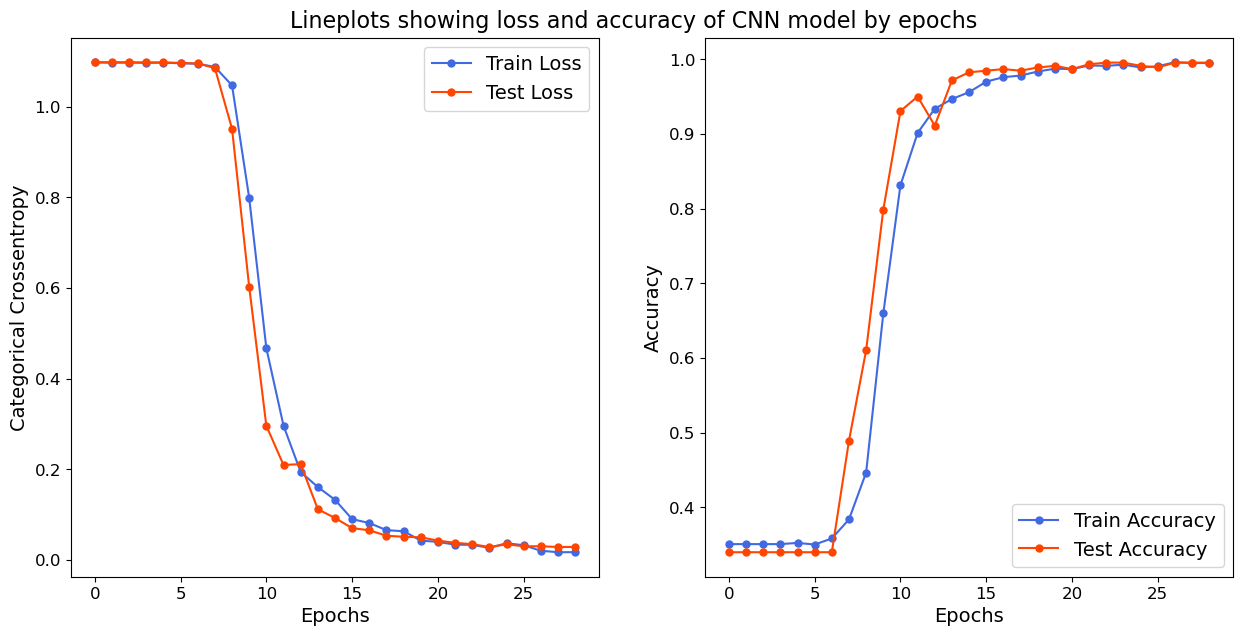

In [15]:
# Checking the train and test loss and accuracy values from the neural network above.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Plotting a line chart to visualize the loss and accuracy values by epochs.
fig, ax = plt.subplots(ncols=2, figsize=(15,7))
ax = ax.ravel()
ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)
ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)
fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [16]:
from keras.models import load_model

In [25]:
model = load_model('../models/symbol.keras')

In [26]:
def prep(image):
    img = load_img(image)
    feature = np.array(img)
    feature = feature.reshape(1, 200, 150, 3)
    return feature / 255.0

In [27]:
def predict_symbol(imagepath):
    image = prep(imagepath)
    pred = model.predict(image).argmax()

    if pred == 0:
        return "Diamond", 0
    if pred == 1: 
        return "Oval", 1
    else:
        return "Squiggle", 2


In [28]:
imagepath = '../cropped/3333/10.jpg'

pred = predict_symbol(imagepath)
print("prediction: ", pred[0])

loaded_image = cv2.imread(imagepath)
cv2.imshow('image ', loaded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 38ms/step
prediction:  Squiggle
